In [145]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [146]:
df = pd.read_csv('/home/ubuntu-pc/DS_Elbrus/Project/rent_real_estate/_data.csv',index_col=0)
pd.set_option('display.max_columns', None)
df.head(5)

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


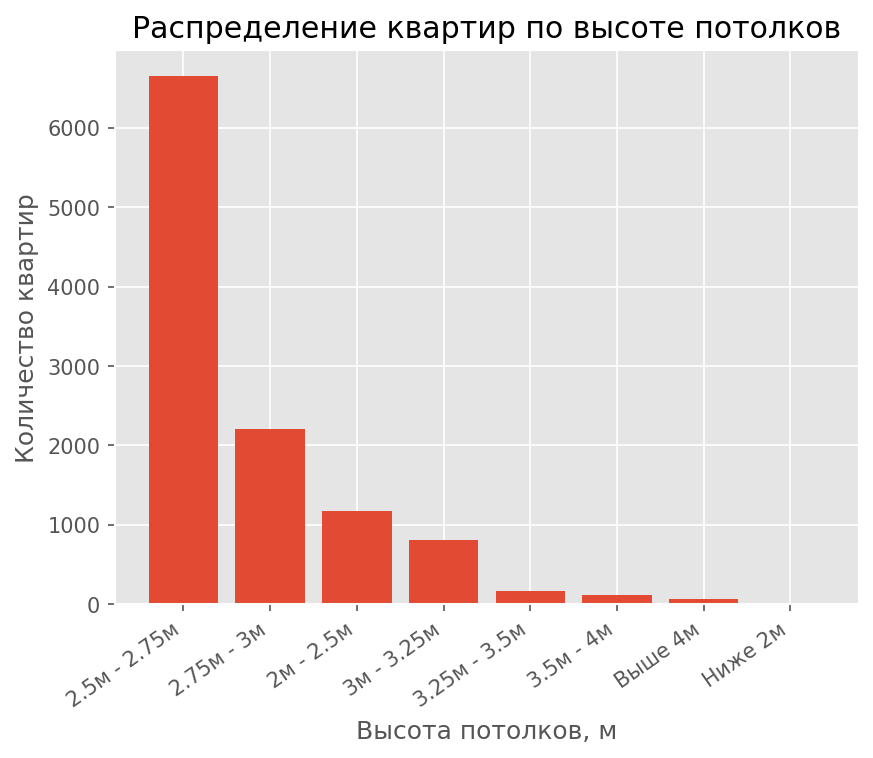

In [147]:
plt.style.use('ggplot')
grouped_df = pd.cut(df['Высота потолков, м'], 
                    bins=[0,2, 2.5, 2.75, 3, 3.25, 3.5, 4, np.inf], 
                    labels=['Ниже 2м','2м - 2.5м', '2.5м - 2.75м', '2.75м - 3м', '3м - 3.25м', '3.25м - 3.5м', '3.5м - 4м', 'Выше 4м'])
counts = grouped_df.value_counts()

plt.rcParams['figure.dpi'] = 150

plt.bar(counts.index, counts.values)
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир')
plt.xticks(rotation=35, ha="right")
plt.title('Распределение квартир по высоте потолков');

/tmp/ipykernel_4986/1907998234.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Можно с детьми/животными'].fillna('С детьми и животными нельзя', inplace=True)


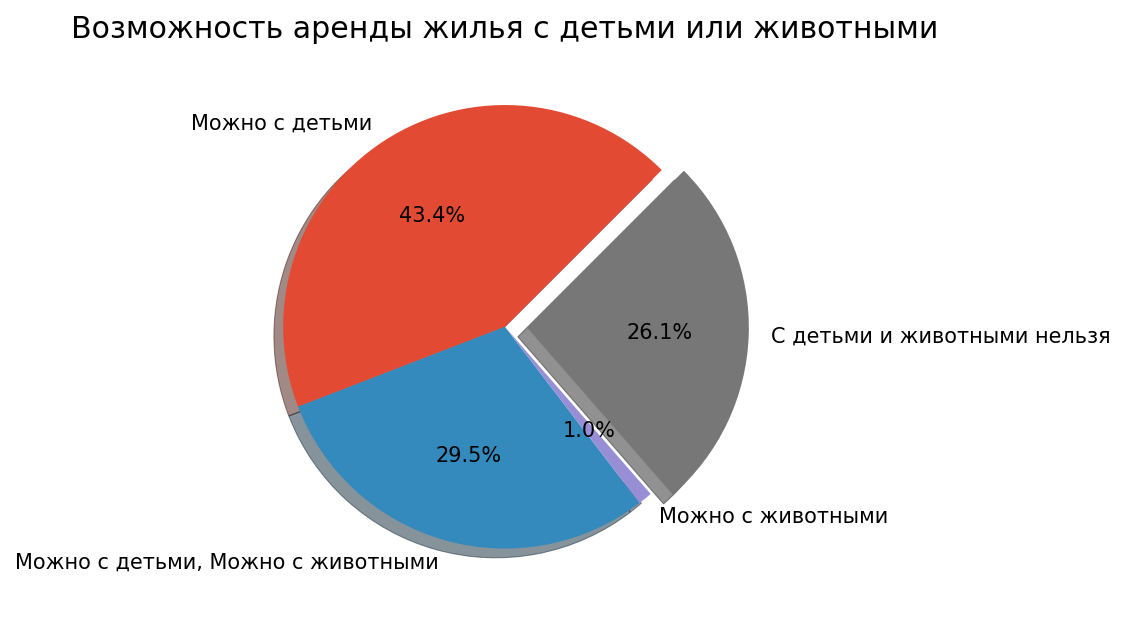

In [148]:
df['Можно с детьми/животными'].fillna('С детьми и животными нельзя', inplace=True)
df_children = df.loc[:, 'Можно с детьми/животными']
df_children_cat = pd.Categorical(df_children)

plt.rcParams['figure.dpi'] = 150

plt.pie(df_children_cat.value_counts(), labels=df_children_cat.categories, explode=(0,0,0,0.1), autopct='%1.1f%%',startangle=45, shadow = True)
plt.title('Возможность аренды жилья с детьми или животными');



In [149]:
df_children_cat.value_counts()

Можно с детьми                       10134
Можно с детьми, Можно с животными     6899
Можно с животными                      239
С детьми и животными нельзя           6096
Name: count, dtype: int64

In [150]:
rooms = pd.DataFrame(df['Количество комнат'].fillna('Не указано').map(lambda x: x.split(',')).to_list(),columns=['Rooms','RoomTypes'])
RoomAmount = rooms.groupby('Rooms')['Rooms'].count()

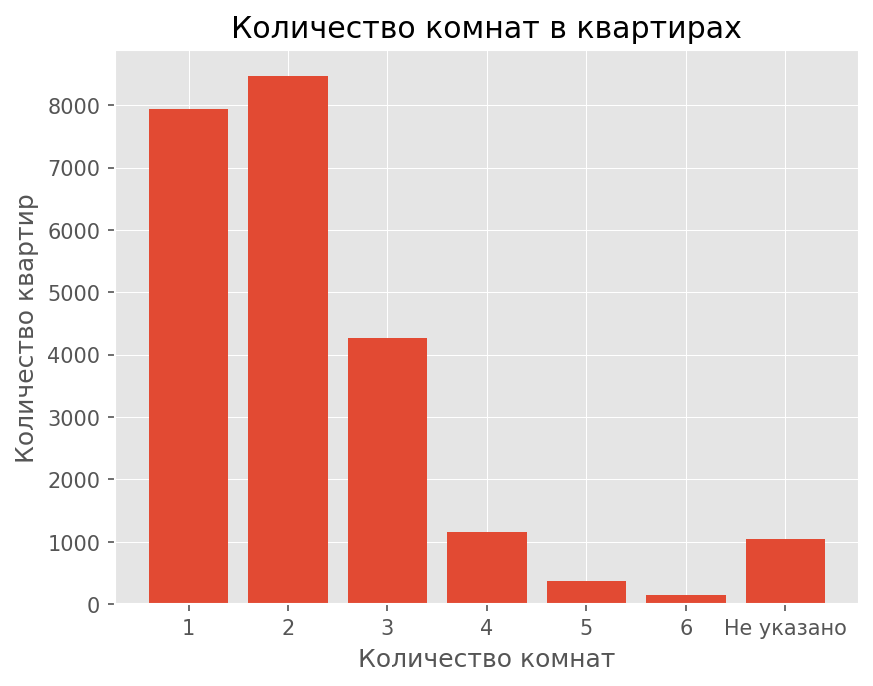

In [176]:
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

plt.bar(RoomAmount.index,RoomAmount.values)

plt.title('Количество комнат в квартирах')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир');


In [160]:
MinToSubway = df['Метро'].fillna('').map(lambda x: re.search(r'(\d) мин',x).group(1) if re.search(r'(\d) мин',x) else 'Не указано').to_frame()
MinToSubway = MinToSubway.groupby('Метро')['Метро'].count()
MinToSubway

Метро
0             3054
1             1321
2             1987
3             1950
4             2102
5             3856
6             1726
7             1964
8             1677
9             1376
Не указано    2355
Name: Метро, dtype: int64

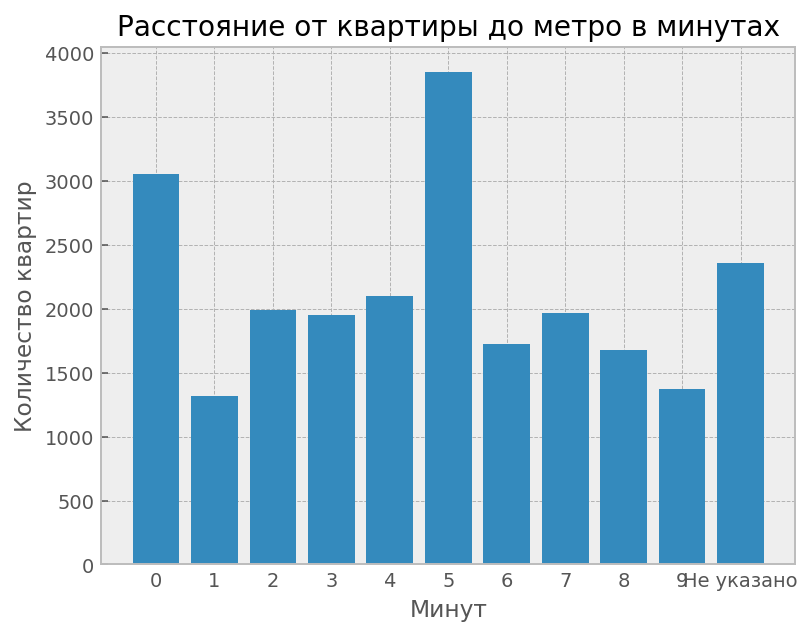

In [175]:
plt.style.use('bmh')

plt.bar(MinToSubway.index,MinToSubway.values)

plt.title('Расстояние от квартиры до метро в минутах')
plt.xlabel('Минут')
plt.ylabel('Количество квартир');


In [169]:
Prices = df['Цена'].fillna('').map(lambda x: float(re.search(r'(\d+\.\d) руб\./',x).group(1)) if re.search(r'(\d+\.\d) руб\./',x) else 0).to_frame()
Prices
#     print(elem)
#     print(re.search(r'(\d+\.\d) руб\./',elem))
#RoomAmount = rooms.groupby('Rooms')['Rooms'].count()
Prices = Prices.groupby(['Цена'])['Цена'].count()
Prices

Цена
0.0          24
10000.0       1
10500.0       1
12000.0       3
12400.0       1
             ..
1700000.0     1
1775000.0     1
2000000.0     1
2500000.0     5
3000000.0     4
Name: Цена, Length: 594, dtype: int64

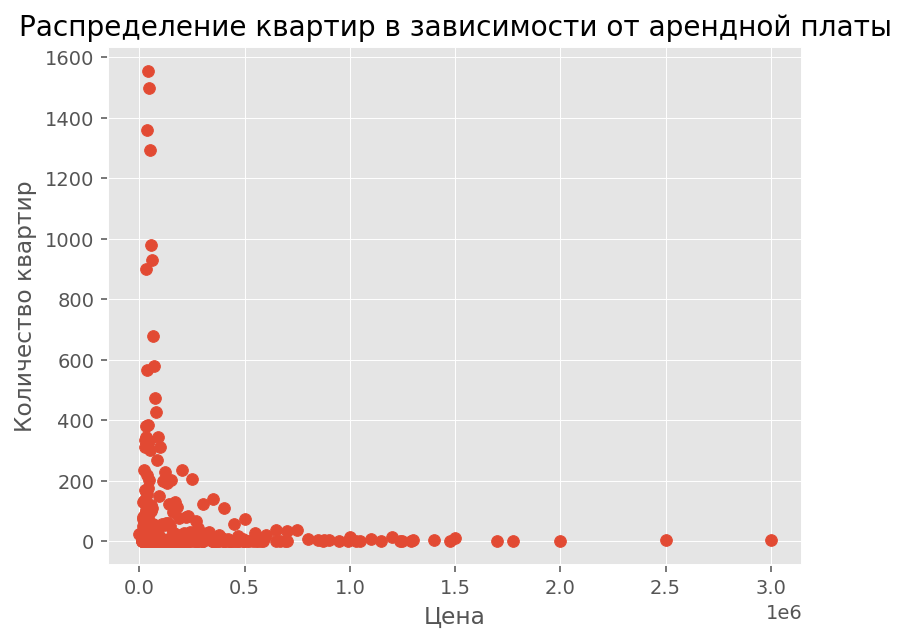

In [174]:
plt.style.use('ggplot')
#plt.rcParams['figure.dpi'] = 150

plt.scatter(Prices.index,Prices)

plt.title('Распределение квартир в зависимости от арендной платы')
plt.xlabel('Цена')
plt.ylabel('Количество квартир');